# **Universidad Nacional de Colombia**
##**Diplomado Machine Learning and Data Science**
###**Proyecto Final: Implementación de Machine Learning para el análisis de Datos de la Educación preescolar, básica y media por municipios entre los años 2011 a 2021 en Colombia**
### **- Modulo Introducción al Machine Learning con Python**
###**Presentado por:** Fabián Ricardo Hernández Gáfaro - Jhon Alexander Sandoval Amaya

# **1. Entendimiento del Negocio**

##**1.1. Objetivos del Negocio**

Haciendo uso de la base de datos del Ministerio de Educación Nacional (MEN) de Colombia (https://www.datos.gov.co/Educaci-n/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR-B-SICA/nudc-7mev), se plantean los siguientes objetivos:

- Hacer un análisis completo mediante Machine Learning de la cobertura de educación preescolar, básica y media de los municipios de Colombia. Para encontrar regiones con deficiencia en esta variable.

- Identificar las variables más relevantes que influyen en la cobertura de educación preescolar, básica y media a través de análisis exploratorio de datos y modelamiento de analítica de datos.

##**1.2. Metas del Proyecto de Machine Learning**

* Desarrollar un modelo de Machine Learning para encontrar los departamentos y regiones de Colombia con mayor y menor deficiencia en cobertura de eduación preescolar, básica y media en Colombia.

* A partir de la meta anterior, desarrollar un modelo analítico para predecir la cobertura de educación básica en una región, utilizando datos socioeconómicos y educativos.

* Evaluar el desempeño de los modelos desarrollados mediante métricas de evaluación, como la matriz de confusión, la precisión, el recall y el F1 score, para determinar su capacidad predictiva.

# **2. Entendimiento de los datos**

##**2.1 Adquisición e integración de datos**

Se obtiene y descarga el archivo **MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv** disponible en la URL https://www.datos.gov.co/  

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
estadisticas_MEN = pd.read_csv('MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO.csv')

In [ ]:
estadisticas_MEN

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,5001,Medellín,5,Antioquia,3759,Medellín,386466,108.73,108.50,...,0.03,0.00,0.00,0.01,0.17,4.57,0.15,3.26,7.44,2.95
1,2011,5002,Abejorral,5,Antioquia,3758,Antioquia (ETC),4146,97.81,97.80,...,1.70,0.00,1.23,2.96,1.18,0.89,0.00,0.85,1.08,1.23
2,2011,5004,Abriaquí,5,Antioquia,3758,Antioquia (ETC),483,88.61,88.60,...,7.29,0.00,1.47,14.66,7.46,1.69,3.13,1.47,2.22,0.00
3,2011,5021,Alejandría,5,Antioquia,3758,Antioquia (ETC),702,118.52,118.50,...,3.58,0.00,2.16,4.39,8.04,0.60,0.00,0.96,0.00,0.00
4,2011,5030,Amagá,5,Antioquia,3758,Antioquia (ETC),6631,78.65,78.70,...,8.99,0.24,6.73,14.46,7.45,0.42,0.00,0.24,0.91,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,2020,97889,Yavaraté,97,Vaupés,3831,Vaupés (ETC),545,48.62,48.62,...,12.54,0.00,18.02,8.33,3.23,5.28,17.86,4.07,5.56,0.00
12336,2020,99001,Puerto Carreño,99,Vichada,3832,Vichada (ETC),4608,127.24,127.17,...,9.78,0.00,8.27,16.44,9.51,9.55,0.20,9.60,13.65,5.14
12337,2020,99524,La Primavera,99,Vichada,3832,Vichada (ETC),2511,98.05,98.05,...,5.19,0.00,7.06,4.37,1.89,8.71,0.00,13.32,4.71,4.15
12338,2020,99624,Santa Rosalía,99,Vichada,3832,Vichada (ETC),1153,87.86,87.86,...,9.60,0.00,11.37,10.80,1.18,11.28,0.00,13.51,12.18,2.35


## **2.2 Análisis exploratorio de datos**

### **2.2.1 Caracterización de los datos**

In [ ]:
estadisticas_MEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12340 entries, 0 to 12339
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          12340 non-null  object 
 1   CÓDIGO_MUNICIPIO             12340 non-null  int64  
 2   MUNICIPIO                    12340 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          12340 non-null  int64  
 4   DEPARTAMENTO                 12340 non-null  object 
 5   CÓDIGO_ETC                   12340 non-null  object 
 6   ETC                          12340 non-null  object 
 7   POBLACIÓN_5_16               12334 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      12225 non-null  float64
 9   COBERTURA_NETA               12229 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    12288 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      12249 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    12246 non-null  float64
 13  COBERTURA_NETA_M

In [ ]:
estadisticas_MEN.columns

Index(['AÑO', 'CÓDIGO_MUNICIPIO', 'MUNICIPIO', 'CÓDIGO_DEPARTAMENTO',
       'DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
   

In [ ]:
estadisticas_MEN.describe()

,CÓDIGO_MUNICIPIO,CÓDIGO_DEPARTAMENTO,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,12340.000000,12340.000000,12225.000000,12229.000000,12288.000000,12249.000000,12246.000000,12247.000000,12272.000000,12243.000000,...,12254.000000,12247.000000,12243.000000,12234.000000,12195.000000,12197.000000,12181.000000,12192.000000,12188.000000,12201.000000
mean,38707.343355,38.273501,85.063649,85.760864,57.112161,82.864927,69.658817,39.948589,98.082745,86.785238,...,4.438578,0.503914,3.609310,6.306826,3.958113,2.449494,0.642758,2.241951,3.308568,1.335559
std,26556.736941,26.570182,19.040147,17.120594,16.384428,17.515265,18.982013,15.527413,21.708541,26.253800,...,4.031081,1.737614,3.767248,6.175160,4.235367,2.564539,1.691318,2.583476,3.767338,1.995300
min,5001.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15676.000000,15.000000,74.570000,77.070000,46.737500,73.450000,60.000000,30.150000,85.990000,70.670000,...,0.460000,0.000000,0.070000,0.140000,0.450000,0.550000,0.000000,0.450000,0.530000,0.000000
50%,25839.000000,25.000000,85.500000,86.710000,57.320000,83.200000,70.700000,40.400000,97.985000,84.550000,...,3.980000,0.000000,2.900000,5.240000,2.750000,1.620000,0.000000,1.430000,2.010000,0.610000
75%,66572.000000,66.000000,95.800000,94.720000,67.570000,92.460000,80.490000,49.705000,110.000000,99.615000,...,7.060000,0.200000,5.715000,10.140000,6.230000,3.600000,0.660000,3.200000,4.900000,1.890000
max,99773.000000,99.000000,279.030000,264.540000,150.470000,254.960000,229.440000,170.260000,286.920000,259.290000,...,49.390000,52.710000,51.970000,76.970000,67.860000,37.470000,33.070000,50.760000,55.070000,36.450000


- Se observa que todas las columnas de variables no categóricas poseen valores faltantes, por lo tanto es necesario tenerlo en consideración para el futuro análisis

- Las variables numéricas están desde la columna 8 hasta la 40.

- Tenemos 6 (de la 1 a la 6) columnas que nos caracterizan cada municipio y su departamento, por lo tanto de estas solo es necesario usar dos de ellas para la clasificación: 'Municipio' y 'Departamento'

- Todas las variables numéricas tienen valores de porcentaje, a excepción de 'población_5_16', 'Tamaño_promedio_de_grupo', 'Sedes_conectadas_a_internet'

* Se observan datos inconsistentes que superan el 100%, lo cual sucede cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos. Estas inconsistencias serán revisadas más adelante

### **2.2.2 Valores faltantes**

In [ ]:
valores_faltantes = estadisticas_MEN.columns[estadisticas_MEN.isnull().any() == True]
print(valores_faltantes)

Index(['POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
      dtype='object')


* Se observa que todas las variables númericas tienen valores nulos, por lo que se debe realizar un proceso de transformación para ser excluidos del analisis o asignar un valor por defecto segun la variable.

A continuación se realiza una inspección numérica de la cantidad de valores faltantes

In [ ]:
estadisticas_MEN.isnull().sum()

AÑO                               0
CÓDIGO_MUNICIPIO                  0
MUNICIPIO                         0
CÓDIGO_DEPARTAMENTO               0
DEPARTAMENTO                      0
CÓDIGO_ETC                        0
ETC                               0
POBLACIÓN_5_16                    6
TASA_MATRICULACIÓN_5_16         115
COBERTURA_NETA                  111
COBERTURA_NETA_TRANSICIÓN        52
COBERTURA_NETA_PRIMARIA          91
COBERTURA_NETA_SECUNDARIA        94
COBERTURA_NETA_MEDIA             93
COBERTURA_BRUTA                  68
COBERTURA_BRUTA_TRANSICIÓN       97
COBERTURA_BRUTA_PRIMARIA         81
COBERTURA_BRUTA_SECUNDARIA       88
COBERTURA_BRUTA_MEDIA           127
TAMAÑO_PROMEDIO_DE_GRUPO       4768
SEDES_CONECTADAS_A_INTERNET    4572
DESERCIÓN                       142
DESERCIÓN_TRANSICIÓN            903
DESERCIÓN_PRIMARIA              242
DESERCIÓN_SECUNDARIA            270
DESERCIÓN_MEDIA                 734
APROBACIÓN                       25
APROBACIÓN_TRANSICIÓN       

In [ ]:
porcentaje_faltantes = 100 * estadisticas_MEN.isnull().sum() / len(estadisticas_MEN)
porcentaje_faltantes = porcentaje_faltantes.sort_values(ascending=False)
print(porcentaje_faltantes)

TAMAÑO_PROMEDIO_DE_GRUPO       38.638574
SEDES_CONECTADAS_A_INTERNET    37.050243
DESERCIÓN_TRANSICIÓN            7.317666
DESERCIÓN_MEDIA                 5.948136
DESERCIÓN_SECUNDARIA            2.188006
DESERCIÓN_PRIMARIA              1.961102
REPITENCIA_TRANSICIÓN           1.288493
REPITENCIA_SECUNDARIA           1.231767
REPITENCIA_PRIMARIA             1.199352
REPROBACIÓN_MEDIA               1.175041
REPITENCIA                      1.158833
DESERCIÓN                       1.150729
REPITENCIA_MEDIA                1.126418
COBERTURA_BRUTA_MEDIA           1.029173
TASA_MATRICULACIÓN_5_16         0.931929
COBERTURA_NETA                  0.899514
REPROBACIÓN_SECUNDARIA          0.858995
APROBACIÓN_MEDIA                0.818476
COBERTURA_BRUTA_TRANSICIÓN      0.786062
REPROBACIÓN_PRIMARIA            0.786062
COBERTURA_NETA_SECUNDARIA       0.761750
COBERTURA_NETA_MEDIA            0.753647
REPROBACIÓN_TRANSICIÓN          0.753647
COBERTURA_NETA_PRIMARIA         0.737439
COBERTURA_BRUTA_

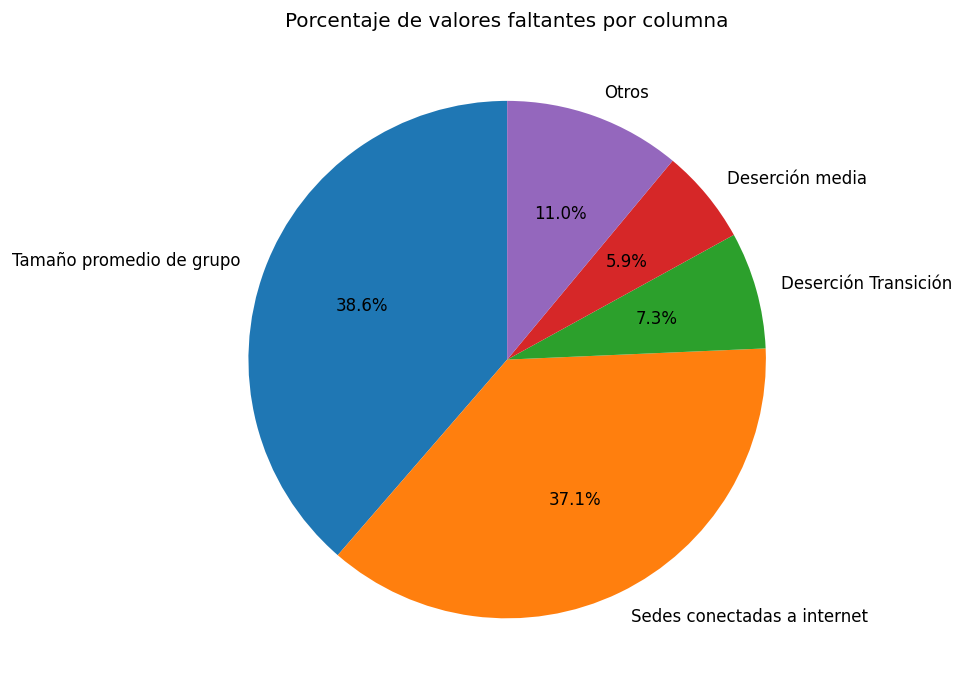

In [ ]:
porcentaje_faltantes_5 = porcentaje_faltantes[porcentaje_faltantes >= 5]
porcentaje_otros = 100 - porcentaje_faltantes_5.sum()
porcentajes = porcentaje_faltantes_5.tolist()
porcentajes.append(porcentaje_otros)
fig, ax = plt.subplots(figsize=(7,7), dpi=120)
ax.pie(porcentajes, labels=['Tamaño promedio de grupo', 'Sedes conectadas a internet', 'Deserción Transición', 'Deserción media', 'Otros'], autopct='%1.1f%%', startangle=90)
ax.set_title('Porcentaje de valores faltantes por columna')
plt.show()

* A partir de estos resultados, concluimos que no es apropiado tener en cuenta las variables 'TAMAÑO_PROMEDIO_DE_GRUPO' ni 'SEDES_CONECTADAS_A_INTERNET' puesto que los datos faltantes en estas columnas son cercanos al 40%, lo cual indica poca confiabilidad en los datos.

### **2.2.3. Descripción de las variables categóricas**

Las siguientes son las varibles categoricas que tiene el dataframe:

In [ ]:
categoricas = estadisticas_MEN.select_dtypes(include=['object', 'bool']).columns
print(categoricas)

Index(['AÑO', 'MUNICIPIO', 'DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC',
       'POBLACIÓN_5_16'],
      dtype='object')


Inspeccionamos la variable 'AÑO':

In [ ]:
registros_por_año = estadisticas_MEN['AÑO'].value_counts()
print('Numero de valores:',len(registros_por_año))
registros_por_año


Numero de valores: 11


2011     1122
2012     1122
2013     1122
2014     1122
2015     1122
2016     1122
2017     1122
2018     1122
2019     1122
2020     1121
2,021    1121
Name: AÑO, dtype: int64

* Se observa que el año 2,021 se debe hacer el ajuste para que quede estandarizado con los demás años.

Inspeccionamos los departamentos y municipios:

In [ ]:
registros_por_año_dep = estadisticas_MEN['DEPARTAMENTO'].value_counts()
print('Numero de valores:',len(registros_por_año_dep))
registros_por_año_dep


Numero de valores: 35


Antioquia                                                   1375
Boyacá                                                      1353
Cundinamarca                                                1276
Santander                                                    957
Nariño                                                       704
Tolima                                                       517
Bolívar                                                      506
Valle del Cauca                                              462
Cauca                                                        462
Norte de Santander                                           440
Huila                                                        407
Chocó                                                        330
Magdalena                                                    330
Córdoba                                                      330
Meta                                                         319
Caldas                   

In [ ]:
registros_por_año_mun = estadisticas_MEN['MUNICIPIO'].value_counts()
print('Numero de valores:',len(registros_por_año_mun))
print(registros_por_año_mun)


Numero de valores: 1036
La Unión         44
Buenavista       44
Villanueva       44
Sucre            33
San Francisco    33
                 ..
Piendamó         11
Tibacuy          11
Bogotá, D.C.     10
Mapiripana        9
Bogotá D.C.       1
Name: MUNICIPIO, Length: 1036, dtype: int64


* Se evidencia que existen dos departamentos escritos de diferente manera, se debe realizar el ajuste para que queden estandarizados para los análisis.

# **3. Preparación de los datos**

## **3.1. Transformación de datos**

### **3.1.1. Transformación de variables categóricas**

Primero realizamos una copia del dataframe que será la que usaremos para el análisis y en la que realizaremos los cambios respectivos. Además eliminaremos las variables categóricas y numéricas que no son importantes para nuestro análisis, como lo observamos en el análisis exploratorio de los datos

In [ ]:
df = estadisticas_MEN.copy()
df = df.drop(['CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC', 'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET'], axis=1)

Realizamos la corrección de las variables categóricas

In [ ]:
df['MUNICIPIO'] = df['MUNICIPIO'].replace('Bogotá, D.C.', 'Bogotá')
df['MUNICIPIO'] = df['MUNICIPIO'].replace('Bogotá D.C.', 'Bogotá')

In [ ]:
municipios = df['MUNICIPIO']
municipios

0              Medellín
1             Abejorral
2              Abriaquí
3            Alejandría
4                 Amagá
              ...      
12335          Yavaraté
12336    Puerto Carreño
12337      La Primavera
12338     Santa Rosalía
12339          Cumaribo
Name: MUNICIPIO, Length: 12340, dtype: object

In [ ]:
df['AÑO'] = df['AÑO'].replace('2,021', '2021')

In [ ]:
anios = df['AÑO'].unique()
anios

array(['2011', '2012', '2013', '2014', '2015', '2020', '2016', '2017',
       '2018', '2019', '2021'], dtype=object)

In [ ]:
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('Archipiélago de San Andrés, Providencia y Santa Catalina', 'San Andrés y Providencia')
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('Archipiélago de San Andrés. Providencia y Santa Catalina', 'San Andrés y Providencia')

In [ ]:
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('Bogotá, D.C.', 'Bogota, D.C.')
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('Bogotá D.C.', 'Bogota, D.C.')

In [ ]:
departamentos = df['DEPARTAMENTO'].unique()
departamentos

array(['Antioquia', 'Atlántico', 'Bogota, D.C.', 'Bolívar', 'Boyacá',
       'Cauca', 'Caldas', 'Chocó', 'Caquetá', 'Amazonas', 'Cesar',
       'Córdoba', 'La Guajira', 'Cundinamarca', 'Nariño', 'Huila',
       'Magdalena', 'Meta', 'Norte de Santander', 'Santander', 'Quindio',
       'Risaralda', 'Sucre', 'Tolima', 'Valle del Cauca', 'Arauca',
       'Casanare', 'Putumayo', 'San Andrés y Providencia', 'Guainía',
       'Guaviare', 'Vaupés', 'Vichada'], dtype=object)

### **3.1.2. Transformación de variables numéricas**

Como no es posible eliminar filas o columnas con valores faltantes, ya que se pierde mucha información. Procederemos a modificar los registros numéricos que presentan problemas y a imputar datos para completar los valores faltantes


Ahora vamos a editar los datos que sobrepasan el 100%, y los acotaremos al valor de 100% puesto que no tenemos más opciones para reescribir los datos. Esto con el objetivo de reducir los errores que se puedan obtener al analizar los datos.

Consideramos que este arreglo se realiza unicamente para las variables numéricas con valores porcentuales, las demás no se tendrán en cuenta aquí.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12340 entries, 0 to 12339
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         12340 non-null  object 
 1   MUNICIPIO                   12340 non-null  object 
 2   DEPARTAMENTO                12340 non-null  object 
 3   POBLACIÓN_5_16              12334 non-null  object 
 4   TASA_MATRICULACIÓN_5_16     12225 non-null  float64
 5   COBERTURA_NETA              12229 non-null  float64
 6   COBERTURA_NETA_TRANSICIÓN   12288 non-null  float64
 7   COBERTURA_NETA_PRIMARIA     12249 non-null  float64
 8   COBERTURA_NETA_SECUNDARIA   12246 non-null  float64
 9   COBERTURA_NETA_MEDIA        12247 non-null  float64
 10  COBERTURA_BRUTA             12272 non-null  float64
 11  COBERTURA_BRUTA_TRANSICIÓN  12243 non-null  float64
 12  COBERTURA_BRUTA_PRIMARIA    12259 non-null  float64
 13  COBERTURA_BRUTA_SECUNDARIA  122

In [ ]:
# Convertir columna 'POBLACIÓN_5_16' a tipo float
df['POBLACIÓN_5_16'] = df['POBLACIÓN_5_16'].str.replace(',', '').astype(float)

In [ ]:
cols = list(df.columns)
df[cols[3:]] = df[cols[3:]].clip(0, 100)

Ya con los valores delimitados, modificamos el dataframe, reemplazando cada valor faltante por el promedio de los datos de la variable de cada municipio por departamento. Por ejemplo, si el municipio Pamplona tiene un valor faltante en la columna 'COBERTURA_NETA', se reemplaza este valor faltante por el promedio de los valores de esta columna de los demás municipios del mismo departamento 'NORTE DE SANTANDER'.

In [ ]:
for col in df.columns[3:]:
    df[col] = df.groupby('DEPARTAMENTO')[col].transform(lambda x: x.fillna(x.mean()))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12340 entries, 0 to 12339
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         12340 non-null  object 
 1   MUNICIPIO                   12340 non-null  object 
 2   DEPARTAMENTO                12340 non-null  object 
 3   POBLACIÓN_5_16              12340 non-null  float64
 4   TASA_MATRICULACIÓN_5_16     12340 non-null  float64
 5   COBERTURA_NETA              12340 non-null  float64
 6   COBERTURA_NETA_TRANSICIÓN   12340 non-null  float64
 7   COBERTURA_NETA_PRIMARIA     12340 non-null  float64
 8   COBERTURA_NETA_SECUNDARIA   12340 non-null  float64
 9   COBERTURA_NETA_MEDIA        12340 non-null  float64
 10  COBERTURA_BRUTA             12340 non-null  float64
 11  COBERTURA_BRUTA_TRANSICIÓN  12340 non-null  float64
 12  COBERTURA_BRUTA_PRIMARIA    12340 non-null  float64
 13  COBERTURA_BRUTA_SECUNDARIA  123

In [ ]:
df

,AÑO,MUNICIPIO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2011,Medellín,Antioquia,100.0,100.00,100.00,79.80,100.00,94.80,59.70,...,0.03,0.00,0.00,0.01,0.17,4.57,0.15,3.26,7.44,2.95
1,2011,Abejorral,Antioquia,100.0,97.81,97.80,50.60,100.00,74.20,36.30,...,1.70,0.00,1.23,2.96,1.18,0.89,0.00,0.85,1.08,1.23
2,2011,Abriaquí,Antioquia,100.0,88.61,88.60,66.70,93.20,79.30,35.30,...,7.29,0.00,1.47,14.66,7.46,1.69,3.13,1.47,2.22,0.00
3,2011,Alejandría,Antioquia,100.0,100.00,100.00,82.70,100.00,90.20,48.50,...,3.58,0.00,2.16,4.39,8.04,0.60,0.00,0.96,0.00,0.00
4,2011,Amagá,Antioquia,100.0,78.65,78.70,55.30,76.30,70.70,38.90,...,8.99,0.24,6.73,14.46,7.45,0.42,0.00,0.24,0.91,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,2020,Yavaraté,Vaupés,100.0,48.62,48.62,31.43,50.00,24.24,14.29,...,12.54,0.00,18.02,8.33,3.23,5.28,17.86,4.07,5.56,0.00
12336,2020,Puerto Carreño,Vichada,100.0,100.00,100.00,100.00,100.00,73.74,31.38,...,9.78,0.00,8.27,16.44,9.51,9.55,0.20,9.60,13.65,5.14
12337,2020,La Primavera,Vichada,100.0,98.05,98.05,57.37,98.84,63.43,32.61,...,5.19,0.00,7.06,4.37,1.89,8.71,0.00,13.32,4.71,4.15
12338,2020,Santa Rosalía,Vichada,100.0,87.86,87.86,53.57,86.38,59.90,22.40,...,9.60,0.00,11.37,10.80,1.18,11.28,0.00,13.51,12.18,2.35


# **4. Modelamiento**

In [ ]:
# Actualizamos scikit-learn a la última versión
!pip install -U scikit-learn

# Importamos scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**4.1. Primer Modelo**

### **4.1.1. Selección de un módelo apropiado para el problema**

Se parte de la hipótesis de que existen ciertos grupos dentro de la variable 'COBERTURA_BRUTA', que podrían clasificarse por el porcentaje de cobertura que tiene cada departamento. De esta forma se quiere encontrar el número de grupos y así identificar los departamentos con mayor porcentaje de municipios que pertenecen al grupo con valores de cobertura más altos, para finalmente graficar las etiquetas y observar la distribución en el mapa de Colombia.

Ahora bien, debido a que los datos no tienen etiquetas, se debe aplicar un modelo de aprendizaje no supervisado, y como queremos detectar grupos, se aplicará el algoritmo de agrupamiento Kmeans.

In [ ]:
from sklearn.cluster import KMeans

### **4.1.2. Construcción del modelo**

Primero, determinamos el número de grupos mediante el método del codo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

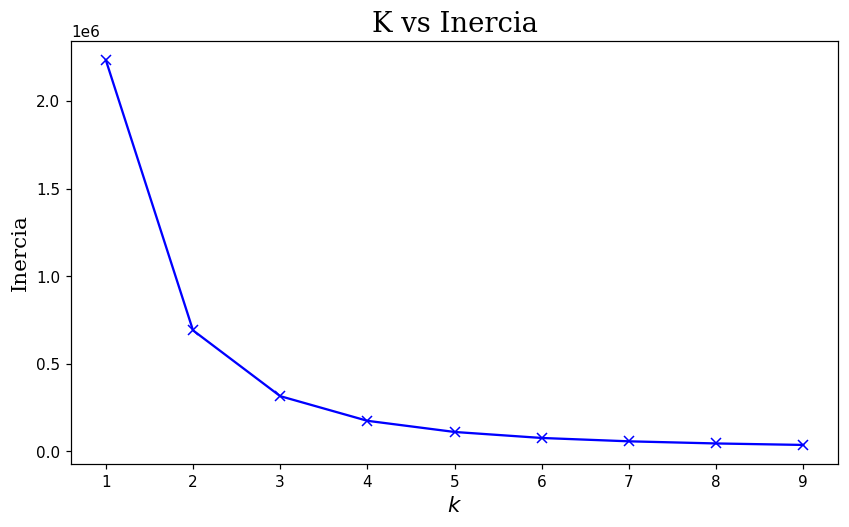

In [ ]:
#Tomamos únicamente los valores de 'COBERTURA_BRUTA' que es nuestra variable de interés
df_cobertura = np.array(df['COBERTURA_BRUTA']).reshape(-1,1)
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cobertura)
    sum_of_squared_distances.append(km.inertia_)

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

plot_metric(K, sum_of_squared_distances, 'Inercia')

Se observa de la gráfica que un buen cluster es 2 o 3. Se elige 2

In [ ]:
km = KMeans(n_clusters=2, random_state=10)
y = km.fit_predict(df_cobertura)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(km.cluster_centers_[1])

[67.78379058]


Debido a que los datos son de 1 dimensión, para visualizar los grupos se realiza un diagrama de dispersión en el que el eje y y el eje x corresponden a los mismo datos.

Text(0.5, 1.0, 'Gráfica de dispersión')

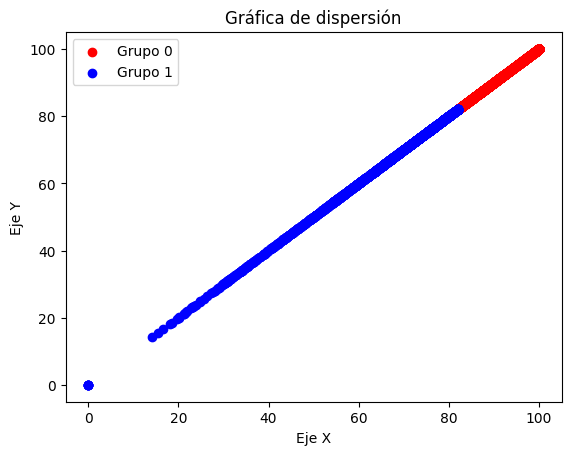

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_cobertura[y == 0], df_cobertura[y == 0], color='red', label='Grupo 0')
ax.scatter(df_cobertura[y == 1], df_cobertura[y == 1], color='blue', label='Grupo 1')

# Agregar una leyenda y títulos de los ejes
ax.legend()
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Gráfica de dispersión')

De esta forma clasificamos el grupo 1 como el grupo con menores valores de cobertura, lo que nos dice que los municipios que pertenezcan a este grupo, tienen los peores valores de cobertura neta

Agregamos al dataframe los valores de la predicción:

In [ ]:
df['clasificacion_cobertura'] = y

Ahora, vamos a mirar por departamento, el porcentaje de municipios pertenecientes al grupo 1, por lo que entre más porcentaje tenga, peor es la cobertura neta en ese departamento.

In [ ]:
#Realizo el promedio de estos valores por departamento
df.groupby('DEPARTAMENTO')['clasificacion_cobertura'].mean().sort_values(ascending=False)*100

DEPARTAMENTO
Amazonas                    79.338843
Guainía                     73.195876
Vaupés                      69.696970
Guaviare                    65.909091
San Andrés y Providencia    45.454545
Putumayo                    41.258741
Arauca                      38.961039
Vichada                     36.363636
Caquetá                     35.795455
La Guajira                  33.939394
Nariño                      30.965909
Chocó                       27.272727
Cauca                       24.242424
Boyacá                      22.764228
Meta                        20.376176
Norte de Santander          17.727273
Casanare                    17.224880
Huila                       16.953317
Santander                   16.718913
Cundinamarca                15.987461
Caldas                      15.488215
Bolívar                     15.217391
Atlántico                   13.438735
Risaralda                   12.337662
Tolima                      12.185687
Antioquia                   11.636364

Estos porcentajes representan la proporción de municipios que se encuentran clasificados como grupo 1, por departamento.

Ahora procedemos a graficar los resultados:

### **4.1.3 Mapa de cobertura**

Procedemos a instalar los paquetes necesarios para graficar los datos encontrados recientemente.

In [ ]:
!gdown https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir

Downloading...
From: https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
To: /content/colombia.zip
100% 50.2M/50.2M [00:01<00:00, 37.7MB/s]


In [ ]:
!pip install -U plotly
!pip install -U geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 100.2 MB/s eta 0:00:00


In [ ]:
mean_cobertura_departamento = df.groupby('DEPARTAMENTO')['clasificacion_cobertura'].mean().sort_values(ascending=False) * 100

In [ ]:
import geopandas as gpd
import plotly
import plotly.graph_objs as go
import plotly.express as px
import json

In [ ]:
!unzip colombia.zip

Archive:  colombia.zip
  inflating: divipola_dpto_index.hdf  
  inflating: divipola_mun_index.hdf  
  inflating: shapes/Cabecera Municipal.dbf  
  inflating: shapes/Cabecera Municipal.prj  
  inflating: shapes/Cabecera Municipal.sbn  
  inflating: shapes/Cabecera Municipal.sbx  
  inflating: shapes/Cabecera Municipal.shp  
  inflating: shapes/Cabecera Municipal.shp.xml  
  inflating: shapes/Cabecera Municipal.shx  
  inflating: shapes/desktop.ini      
  inflating: shapes/Fuera colombia.dbf  
  inflating: shapes/Fuera colombia.prj  
  inflating: shapes/Fuera colombia.sbn  
  inflating: shapes/Fuera colombia.sbx  
  inflating: shapes/Fuera colombia.shp  
  inflating: shapes/Fuera colombia.shx  
  inflating: shapes/Limite Departamental.dbf  
  inflating: shapes/Limite Departamental.prj  
  inflating: shapes/Limite Departamental.sbn  
  inflating: shapes/Limite Departamental.sbx  
  inflating: shapes/Limite Departamental.shp  
  inflating: shapes/Limite Departamental.shp.xml  
  inflating

In [ ]:
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp") # Información geográfica de los departamentos de Colombia.

In [ ]:
col_deps['geometry'] = col_deps['geometry'].simplify(1e-2)
#col_deps['COBERTURA_NETA']=df_2011_2019.groupby(['DEPARTAMENTO'])['COBERTURA_NETA'].mean()
col_deps

,COD_DEPART,COUNT,Nombre,geometry
0,05,125,ANTIOQUIA,"POLYGON ((-74.88001 5.74658, -74.99279 5.71491..."
1,08,23,ATLANTICO,"POLYGON ((-74.72511 10.77173, -74.72330 10.668..."
2,11,1,"BOGOTA, D.C.","POLYGON ((-74.00669 4.82357, -73.99905 4.80378..."
3,13,46,BOLIVAR,"POLYGON ((-73.81547 7.69167, -73.79711 7.65132..."
4,15,123,BOYACA,"POLYGON ((-72.74243 6.56634, -72.70467 6.54096..."
5,17,27,CALDAS,"POLYGON ((-75.71407 5.54761, -75.68591 5.52505..."
6,18,16,CAQUETA,"POLYGON ((-75.80890 0.89557, -75.82903 0.87484..."
7,19,42,CAUCA,"POLYGON ((-76.31618 1.68438, -76.24163 1.68197..."
8,20,25,CESAR,"POLYGON ((-73.79151 10.39283, -73.74075 10.435..."
9,23,30,CORDOBA,"POLYGON ((-75.70427 9.37331, -75.68761 9.35678..."


In [ ]:
import unicodedata

#Proceso de transformacion de los departamentos
df.loc[:, 'DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()
df.loc[:, 'DEPARTAMENTO'] = df['DEPARTAMENTO'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df.loc[:, 'DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('GUAINIA', 'GUANIA')
df.loc[:, 'DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('NARINO', 'NARIÑO')
#depto_cobertura = df.groupby(['DEPARTAMENTO'])['COBERTURA_NETA'].mean()
mean_cobertura_departamento = df.groupby('DEPARTAMENTO')['clasificacion_cobertura'].mean().sort_values(ascending=False) * 100

In [ ]:
#Con el fin que los indices queden iguales entre el mapa y el dataframe de cobertura, es necesario reindexar los departamentos.
depto_cobertura_df = mean_cobertura_departamento.to_frame().reset_index()
dict_indices = {'ANTIOQUIA':0,'ATLANTICO':1,'BOGOTA, D.C.':2,'BOLIVAR':3,'BOYACA':4,'CALDAS':5,'CAQUETA':6,'CAUCA':7,'CESAR':8,'CORDOBA':9,'CUNDINAMARCA':10,'CHOCO':11,'HUILA':12,'LA GUAJIRA':13,'MAGDALENA':14,'META':15,'NARIÑO':16,'NORTE DE SANTANDER':17,'QUINDIO':18,'RISARALDA':19,'SANTANDER':20,'SUCRE':21,'TOLIMA':22,'VALLE DEL CAUCA':23,'ARAUCA':24,'CASANARE':25,'PUTUMAYO':26,'SAN ANDRES Y PROVIDENCIA':27,'AMAZONAS':28,'GUANIA':29,'GUAVIARE':30,'VAUPES':31,'VICHADA':32}
depto_cobertura_df = depto_cobertura_df.set_index('DEPARTAMENTO')
depto_cobertura_df = depto_cobertura_df.rename(index=dict_indices)

In [ ]:
#crea un objeto GeoDataFrame a partir de la geometría en col_deps['geometry'],
col_deps_gdf = gpd.GeoDataFrame(col_deps, geometry='geometry')
col_deps_gdf = col_deps_gdf.reset_index()

In [ ]:
#Realiza el merge entre los dataframe col_deps_gdf y depto_cobertura_df
col_deps_cobertura = col_deps_gdf.merge(depto_cobertura_df, left_index=True, right_index=True)
col_deps_cobertura

,index,COD_DEPART,COUNT,Nombre,geometry,clasificacion_cobertura
0,0,05,125,ANTIOQUIA,"POLYGON ((-74.88001 5.74658, -74.99279 5.71491...",11.636364
1,1,08,23,ATLANTICO,"POLYGON ((-74.72511 10.77173, -74.72330 10.668...",13.438735
2,2,11,1,"BOGOTA, D.C.","POLYGON ((-74.00669 4.82357, -73.99905 4.80378...",0.000000
3,3,13,46,BOLIVAR,"POLYGON ((-73.81547 7.69167, -73.79711 7.65132...",15.217391
4,4,15,123,BOYACA,"POLYGON ((-72.74243 6.56634, -72.70467 6.54096...",22.764228
5,5,17,27,CALDAS,"POLYGON ((-75.71407 5.54761, -75.68591 5.52505...",15.488215
6,6,18,16,CAQUETA,"POLYGON ((-75.80890 0.89557, -75.82903 0.87484...",35.795455
7,7,19,42,CAUCA,"POLYGON ((-76.31618 1.68438, -76.24163 1.68197...",24.242424
8,8,20,25,CESAR,"POLYGON ((-73.79151 10.39283, -73.74075 10.435...",9.090909
9,9,23,30,CORDOBA,"POLYGON ((-75.70427 9.37331, -75.68761 9.35678...",6.969697


In [ ]:
# Usamos json.loads para almacenar un objeto en este formato a partir de un GeoDataFrame.

col_json = json.loads(col_deps_cobertura.to_json())
#col_json = col_deps_merged.to_json()

In [ ]:
# Convertimos la información del GeoDataFrame al formato JSON.

print(col_json['features'][0])

{'id': '0', 'type': 'Feature', 'properties': {'index': 0, 'COD_DEPART': '05', 'COUNT': 125, 'Nombre': 'ANTIOQUIA', 'clasificacion_cobertura': 11.636363636363637}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-74.8800113808204, 5.746575611275603], [-74.99279268223637, 5.714906566385082], [-75.0089231086144, 5.681758741073224], [-75.093648226884, 5.655588804080198], [-75.09210778714453, 5.584338173168305], [-75.1283886930836, 5.5550472379398474], [-75.13722196192384, 5.527359633840208], [-75.21976911465276, 5.50349470241872], [-75.27529891361382, 5.4188531644421705], [-75.28147486207507, 5.47649960057629], [-75.31610946727795, 5.462208122307175], [-75.31025299128237, 5.507539861075887], [-75.3280223502511, 5.525190157000285], [-75.3399279199374, 5.602776660114955], [-75.3673468920453, 5.602759780739463], [-75.38375370436978, 5.622609134903827], [-75.36879875755648, 5.640496748426358], [-75.37631231176363, 5.67470583400717], [-75.4293093203687, 5.696511261285822], [-75.4790270473602,

In [ ]:
col = px.choropleth(col_deps_cobertura,                 # El GeoDataFrame/DataFrame donde están los datos
                    geojson = col_json,                 # GeoJSON obtenido a partir de la geometría del GeoDataFrame.
                    color="clasificacion_cobertura",    # Nombre de la columna del dataframe que queremos representar en el mapa coroplético
                    locations="Nombre",                 # Nombre de la columna del dataframe que coincide con las localizaciones
                    featureidkey="properties.Nombre",   # Llave dentro del GeoJSON usada como referencia.
                    color_continuous_scale  = ["#b35806", "#e08214", "#fdb863", "#fee0b6", "#ffffcc"],
                    projection="mercator",
                    labels={'Cobertura Neta':'Número de<br>Municipios'} # Como queremos que aparezca la información
)
col.update_geos(fitbounds="locations", visible=False) # Para que aparezca centrado donde están los datos (en Colombia)
col.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
col.show()

De este mapa es fácil observar que los departamentos ubicados en las regiones de la Amazonía y Orinoquía son los que tienen peores índices de cobertura neta. De igual forma se observa que los departamentos de la región Andina (los departamentos más centralizados), en general mantienen los mejores índices de cobertura.

##**4.2 Segundo Modelo - Arbol de Decision**

In [ ]:
print(df.isna().sum())

AÑO                           0
MUNICIPIO                     0
DEPARTAMENTO                  0
POBLACIÓN_5_16                0
TASA_MATRICULACIÓN_5_16       0
COBERTURA_NETA                0
COBERTURA_NETA_TRANSICIÓN     0
COBERTURA_NETA_PRIMARIA       0
COBERTURA_NETA_SECUNDARIA     0
COBERTURA_NETA_MEDIA          0
COBERTURA_BRUTA               0
COBERTURA_BRUTA_TRANSICIÓN    0
COBERTURA_BRUTA_PRIMARIA      0
COBERTURA_BRUTA_SECUNDARIA    0
COBERTURA_BRUTA_MEDIA         0
DESERCIÓN                     0
DESERCIÓN_TRANSICIÓN          0
DESERCIÓN_PRIMARIA            0
DESERCIÓN_SECUNDARIA          0
DESERCIÓN_MEDIA               0
APROBACIÓN                    0
APROBACIÓN_TRANSICIÓN         0
APROBACIÓN_PRIMARIA           0
APROBACIÓN_SECUNDARIA         0
APROBACIÓN_MEDIA              0
REPROBACIÓN                   0
REPROBACIÓN_TRANSICIÓN        0
REPROBACIÓN_PRIMARIA          0
REPROBACIÓN_SECUNDARIA        0
REPROBACIÓN_MEDIA             0
REPITENCIA                    0
REPITENC

In [ ]:
df.sample(10)

,AÑO,MUNICIPIO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA,clasificacion_cobertura
7478,2017,Funes,NARIÑO,100.0,76.100000,76.070000,41.120000,67.550000,73.350000,46.900000,...,0.000000,0.0000,0.000000,0.000000,2.850000,0.000000,1.650000,4.960000,1.830000,0
6737,2016,Santa Rosalía,VICHADA,100.0,74.800000,74.780000,24.140000,79.560000,40.870000,18.380000,...,1.470000,10.3800,10.340000,0.000000,1.850000,0.000000,1.760000,3.070000,0.000000,0
3363,2013,Papunaua,VAUPES,100.0,63.275614,60.228305,27.060169,61.327627,30.827288,10.910545,...,0.714615,9.6806,7.688868,4.153519,3.381481,0.991852,3.634808,3.079273,1.117273,1
1847,2012,Contadero,NARIÑO,100.0,50.360000,50.400000,37.200000,57.300000,35.700000,19.400000,...,0.000000,1.3300,8.300000,0.000000,7.050000,0.000000,4.550000,3.713088,3.530000,1
4287,2014,San José de Miranda,SANTANDER,100.0,75.930000,84.040000,58.930000,86.680000,61.350000,52.940000,...,0.000000,0.5400,17.050000,13.790000,5.810000,0.000000,0.820000,2.947635,1.720000,0
11786,2021,El Zulia,NORTE DE SANTANDER,100.0,91.960000,91.930000,57.670000,87.770000,82.350000,46.320000,...,0.810000,3.9600,9.640000,9.250000,3.060000,0.200000,1.400000,5.440000,3.900000,0
4733,2015,La Victoria,BOYACA,100.0,60.260000,60.260000,43.330000,56.050000,54.890000,20.000000,...,0.000000,0.0000,2.170000,0.000000,2.130000,0.000000,1.920000,2.170000,4.760000,1
2707,2013,Agua de Dios,CUNDINAMARCA,100.0,86.150000,86.200000,49.200000,78.000000,76.200000,51.300000,...,0.000000,0.0000,0.000000,0.700000,4.850000,0.000000,4.390000,7.140000,2.100000,0
8583,2018,Colón,NARIÑO,100.0,63.000000,92.860000,59.800000,97.020000,76.830000,37.040000,...,0.000000,0.0000,0.000000,0.000000,1.840000,0.000000,0.980000,3.490000,1.010000,0
8046,2018,San Martín de Loba,BOLIVAR,100.0,83.340000,100.000000,74.460000,100.000000,79.050000,36.350000,...,2.380000,2.9900,6.300000,4.790000,1.300000,2.740000,1.280000,0.960000,0.530000,0


In [ ]:
valores_cobertura = df['clasificacion_cobertura'].unique()
print(valores_cobertura)


[0 1]


In [ ]:
df['COBERTURA_CATEGORIA'] = df['clasificacion_cobertura'].replace({0: 'ALTO', 1: 'BAJO'})

In [ ]:
valores_cobertura = df['COBERTURA_CATEGORIA'].unique()
print(valores_cobertura)

['ALTO' 'BAJO']


In [ ]:
print(df.isna().sum())

AÑO                           0
MUNICIPIO                     0
DEPARTAMENTO                  0
POBLACIÓN_5_16                0
TASA_MATRICULACIÓN_5_16       0
COBERTURA_NETA                0
COBERTURA_NETA_TRANSICIÓN     0
COBERTURA_NETA_PRIMARIA       0
COBERTURA_NETA_SECUNDARIA     0
COBERTURA_NETA_MEDIA          0
COBERTURA_BRUTA               0
COBERTURA_BRUTA_TRANSICIÓN    0
COBERTURA_BRUTA_PRIMARIA      0
COBERTURA_BRUTA_SECUNDARIA    0
COBERTURA_BRUTA_MEDIA         0
DESERCIÓN                     0
DESERCIÓN_TRANSICIÓN          0
DESERCIÓN_PRIMARIA            0
DESERCIÓN_SECUNDARIA          0
DESERCIÓN_MEDIA               0
APROBACIÓN                    0
APROBACIÓN_TRANSICIÓN         0
APROBACIÓN_PRIMARIA           0
APROBACIÓN_SECUNDARIA         0
APROBACIÓN_MEDIA              0
REPROBACIÓN                   0
REPROBACIÓN_TRANSICIÓN        0
REPROBACIÓN_PRIMARIA          0
REPROBACIÓN_SECUNDARIA        0
REPROBACIÓN_MEDIA             0
REPITENCIA                    0
REPITENC

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12340 entries, 0 to 12339
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         12340 non-null  object 
 1   MUNICIPIO                   12340 non-null  object 
 2   DEPARTAMENTO                12340 non-null  object 
 3   POBLACIÓN_5_16              12340 non-null  float64
 4   TASA_MATRICULACIÓN_5_16     12340 non-null  float64
 5   COBERTURA_NETA              12340 non-null  float64
 6   COBERTURA_NETA_TRANSICIÓN   12340 non-null  float64
 7   COBERTURA_NETA_PRIMARIA     12340 non-null  float64
 8   COBERTURA_NETA_SECUNDARIA   12340 non-null  float64
 9   COBERTURA_NETA_MEDIA        12340 non-null  float64
 10  COBERTURA_BRUTA             12340 non-null  float64
 11  COBERTURA_BRUTA_TRANSICIÓN  12340 non-null  float64
 12  COBERTURA_BRUTA_PRIMARIA    12340 non-null  float64
 13  COBERTURA_BRUTA_SECUNDARIA  123

### **4.2.1. Selección de un módelo apropiado para el problema**

El modelo de clasificación de árbol de decisión resuelve el problema de predecir la cobertura neta de la educación primaria en función de ciertas variables como la población y la tasa de matriculación en colombia y tiene estas ventajas de implementación que hacen que sea el modelo analìtico a implementar:

1. Adecuado para variables categóricas: El modelo de árbol de decisión es una técnica de aprendizaje supervisado que funciona bien para variables categóricas, como es el caso de la variable objetivo de este análisis (cobertura categorizada en 2 niveles). Por lo tanto, este modelo es adecuado para este tipo de problemas.

2. Interpretabilidad: El modelo de árbol de decisión es fácilmente interpretable y permite entender cómo se llega a una determinada clasificación. En este caso, se puede entender qué factores son los más importantes para predecir la cobertura en las distintas categorías, lo cual puede ayudar a tomar decisiones y diseñar estrategias en función de estos resultados.

3. Eficiencia computacional: El modelo de árbol de decisión es relativamente rápido y fácil de implementar, lo que lo hace una buena opción cuando se tienen recursos computacionales limitados o se busca una solución eficiente en tiempo y costo.



### **4.2.2 Diseño de la Experimentación (Validación cruzada)**

La validación cruzada es una técnica importante para evaluar el rendimiento de un modelo y verificar que no está sobreajustando los datos de entrenamiento. Para implementar la validación cruzada en nuestro modelo, podemos seguir los siguientes pasos:

Dividir el conjunto de datos en k partes iguales (k-fold cross-validation).
Para cada iteración, utilizar k-1 partes para entrenar el modelo y la parte restante para validar el modelo.
Repetir el proceso k veces, utilizando cada parte como conjunto de validación una vez.
Calcular la métrica de evaluación deseada (por ejemplo, la precisión) para cada iteración y tomar el promedio.

El objetivo de este código es evaluar el rendimiento de un modelo de árbol de decisión para predecir la variable COBERTURA_CATEGORIA utilizando las variables independientes POBLACIÓN_5_16 y TASA_MATRICULACIÓN_5_16

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


df_new = df.dropna(subset=['COBERTURA_CATEGORIA'])

# Definir variables independientes (X) y variable dependiente (y)
X = df_new[['POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16']]
y = df_new['COBERTURA_CATEGORIA']

# Realizar validación cruzada para diferentes valores de n_splits
for n_splits in range(2, 11):
    # Crear objeto KFold para la validación cruzada
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Crear modelo de árbol de decisión
    model = DecisionTreeClassifier()

    # Realizar validación cruzada
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

    # Calcular el promedio de la precisión
    mean_accuracy = scores.mean()

    print(f'Para {n_splits} pliegues, la precisión promedio es {mean_accuracy:.3f}')


Para 2 pliegues, la precisión promedio es 0.904
Para 3 pliegues, la precisión promedio es 0.906
Para 4 pliegues, la precisión promedio es 0.907
Para 5 pliegues, la precisión promedio es 0.908
Para 6 pliegues, la precisión promedio es 0.907
Para 7 pliegues, la precisión promedio es 0.908
Para 8 pliegues, la precisión promedio es 0.910
Para 9 pliegues, la precisión promedio es 0.908
Para 10 pliegues, la precisión promedio es 0.909


### **4.2.3 Construcción y Entrenamiento de los Módelos**

Se entrena el arbol de decisión con 8 pliegues por tener el valor de precision mas alto.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Cargar datos y limpiar valores nulos
df_new = df.dropna(subset=['COBERTURA_CATEGORIA'])

# Definir variables independientes (X) y variable dependiente (y)
X = df_new[['POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16']]
y = df_new['COBERTURA_CATEGORIA']

# Especificar el número de pliegues
n_splits = 8

# Crear objeto KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Crear lista para almacenar las precisiones obtenidas en cada pliegue
accuracies = []

# Iterar sobre cada pliegue
for train_index, test_index in kf.split(X):
    # Dividir datos en conjunto de entrenamiento y conjunto de prueba para cada pliegue
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Crear modelo de árbol de decisión
    model = DecisionTreeClassifier()

    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predecir valores para el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular precisión y agregarla a la lista de precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Calcular la precisión media y desviación estándar
mean_accuracy = sum(accuracies) / n_splits
std_accuracy = np.std(accuracies)

print('Precisión promedio:', mean_accuracy)
print('Desviación estándar:', std_accuracy)


Precisión promedio: 0.9102900173411912
Desviación estándar: 0.00773693820755957


* El modelo clasifica correctamente el 91.10% de los datos.

* La desviación estándar (standard deviation) de 0.0077 indica cuánto varía la precisión en cada uno de los pliegues. En este caso, una desviación estándar baja sugiere que el modelo es consistente y estable en su rendimiento en los diferentes pliegues de la validación cruzada.

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None,
                           feature_names=['POBLACIÓN_5_16', 'TASA_MATRICULACIÓN_5_16'],
                           class_names=['ALTO','BAJO'] ,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

# **5. Evaluación de desempeño**

## **5.1 Primer Modelo - Kmeans**

### **5.1.1 Criterios de evaluación**

Debido a que no tenemos información externa para determinar qué tan homogéneos son los datos resultantes, se usa una evaluación interna mediante el coeficiente de silueta

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

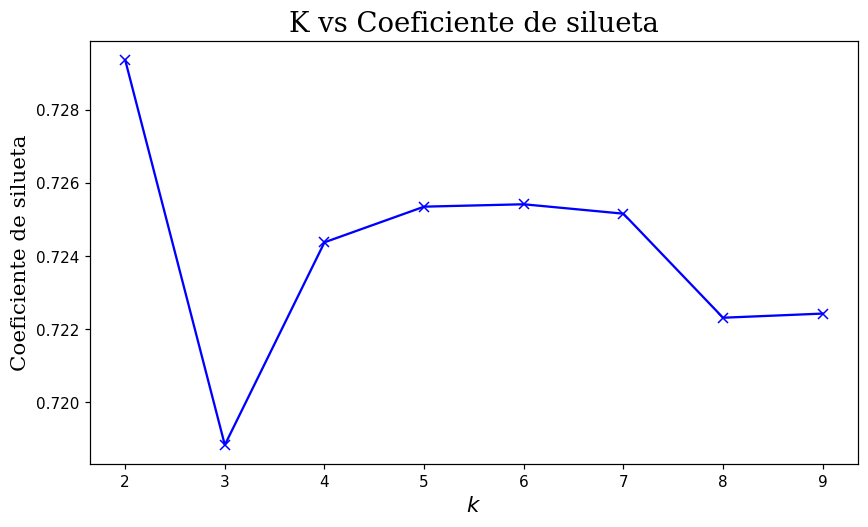

In [ ]:
from sklearn.metrics import silhouette_score
df_cobertura = np.array(df['COBERTURA_BRUTA']).reshape(-1,1)
silhouette_scores = []
K = range(2,10)
for k in K:
    km1 = KMeans(n_clusters=k)
    y1 = km1.fit_predict(df_cobertura)
    silhouette_scores.append(silhouette_score(df_cobertura, y1))

plot_metric(K, silhouette_scores, 'Coeficiente de silueta')

Como el valor de silueta a elegir debe ser el máximo, observamos que k=2 corresponde a este valor, lo que nos indica que la elección fue apropiada. Además, debido a que este valor es cercano a 1, nos indica que la muestra está bien ajustada a su cluster y alejada de los clusters vecinos.

##**5.2 Segundo Modelo - Arbol de Decision**

### **5.2.1 Métricas de evaluación**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[1193   61]
 [  82  206]]


En tu caso, la matriz de confusión muestra que el modelo ha clasificado correctamente 1193 observaciones de la clase 0 (verdaderos negativos) y 206 observaciones de la clase 1 (verdaderos positivos). Sin embargo, ha clasificado incorrectamente 61 observaciones de la clase 0 (falsos positivos) y 82 observaciones de la clase 1 (falsos negativos).

A continuación se describe porcentualmente la clasificación obtenida de la matriz de confusión:

* Verdaderos positivos (VP): 1193 / 1542 * 100 = 77.29%
* Falsos positivos (FP): 61 / 1542 * 100 = 3.95%
* Falsos negativos (FN): 82 / 1542 * 100 = 5.32%
* Verdaderos negativos (VN): 206 / 1542 * 100 = 13.44%

In [ ]:
# Evaluar precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precisión:")
print(precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:")
print(recall)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:")
print(f1)

Precisión del modelo: 0.9072632944228275
Precisión:
0.9050277791350876
Recall:
0.9072632944228275
F1 Score:
0.90589384404968


Las conclusiones a partir de estos indicadores son:

* La precisión del modelo es de 0.9072632944228275, lo que indica que el modelo tiene una tasa alta de aciertos en la predicción de los valores positivos.

* La precisión de 0.9050277791350876, es muy similar a la anterior, por lo que se puede afirmar que el modelo es consistente en su capacidad para predecir los valores positivos.

* El recall, que mide la capacidad del modelo para encontrar todos los valores positivos, tiene un valor de 0.9072632944228275, lo que indica que el modelo es bueno para detectar los valores positivos.

* El F1 Score, que combina la precisión y el recall en un solo valor, es de 0.90589384404968, lo que indica que el modelo tiene un buen equilibrio entre la precisión y la capacidad de encontrar los valores positivos.

En resumen, los indicadores sugieren que el modelo tiene un rendimiento aceptable en la tarea de clasificación

# **6. Análisis de los Resultados**

A partir del análisis realizado, se pueden hacer algunas conclusiones y recomendaciones de negocio:

1. La tasa de cobertura neta de la educación básica en Colombia es alta en la mayoría de departamentos, superando el 90% muchos casos, lo que indica que la mayoría de los niños en edad escolar están siendo atendidos por el sistema educativo. Sin embargo, hay algunas regiones y departamentos en los que la cobertura neta es más baja, destacando en particular los departamentos de las regiones de Amazonía y Orinoquía quienes tienen los peores índices, sugiriendo que podrían ser necesarias más inversiones y esfuerzos para mejorar el acceso a la educación en esas áreas.

2. La tasa de matriculación de niños de 5 a 16 años tiene una correlación positiva con la tasa de cobertura neta de la educación básica, lo que sugiere que un mayor acceso a la educación contribuye a aumentar la cobertura neta. Por lo tanto, es importante seguir fomentando la matriculación de los niños en edad escolar y asegurarse de que tengan acceso a una educación de calidad.

3. La precisión del modelo de predicción de cobertura neta fue del 90%, lo que indica que el modelo es bastante confiable para predecir la cobertura neta de la educación básica en Colombia. Sin embargo, se debe tener en cuenta que existen otras variables que también podrían influir en la cobertura neta y que no se han tenido en cuenta en este análisis.

En resumen, este análisis puede ser de gran ayuda para los tomadores de decisiones en el ámbito educativo y gubernamental para identificar áreas de oportunidad y diseñar estrategias para mejorar la cobertura neta de la educación básica en Colombia.